### K-Means Clustering

Kaggle Dataset  - https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.shape

(660, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.describe(include = 'all').round(2)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,330.50,55141.44,34574.24,4.71,2.40,2.61,3.58
std,190.67,25627.77,37625.49,2.17,1.63,2.94,2.87
min,1.00,11265.00,3000.00,1.00,0.00,0.00,0.00
25%,165.75,33825.25,10000.00,3.00,1.00,1.00,1.00
50%,330.50,53874.50,18000.00,5.00,2.00,2.00,3.00
75%,495.25,77202.50,48000.00,6.00,4.00,4.00,5.00
max,660.00,99843.00,200000.00,10.00,5.00,15.00,10.00


In [7]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### There are no null values and data looks clean.

<Axes: >

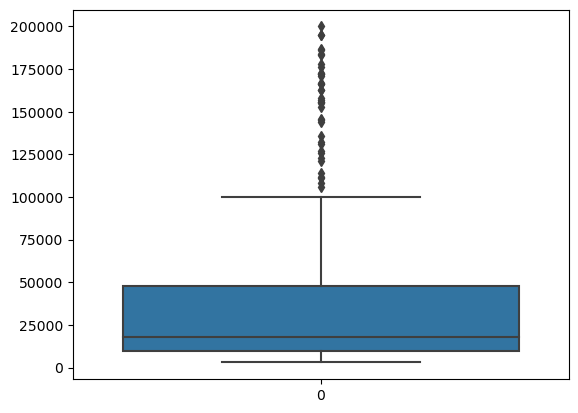

In [8]:
sns.boxplot(df.Avg_Credit_Limit)

The column "Avg_Credit_Limit" seem to have outliers but as the data is consistent, we chose to ignore it rather than handling them by replacing the values or removing the rows.

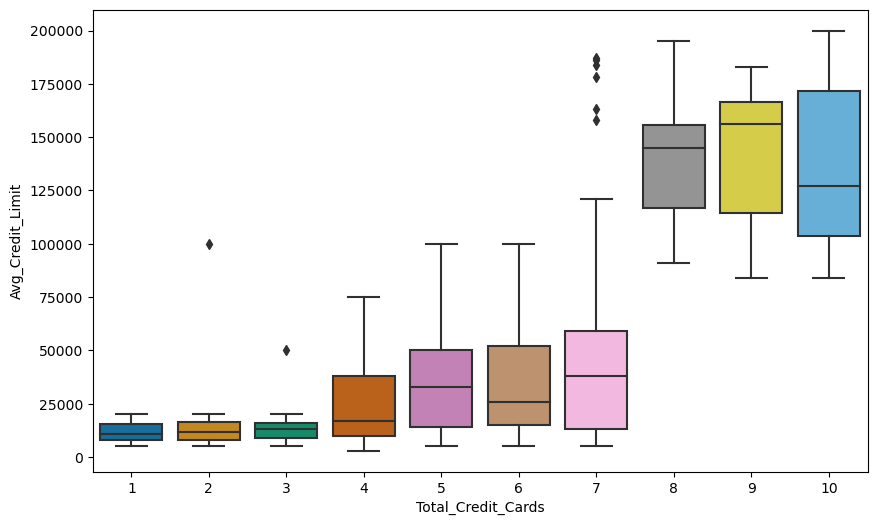

In [9]:
ax = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = df, 
                 x = 'Total_Credit_Cards', 
                 y = 'Avg_Credit_Limit', 
                 palette = 'colorblind')

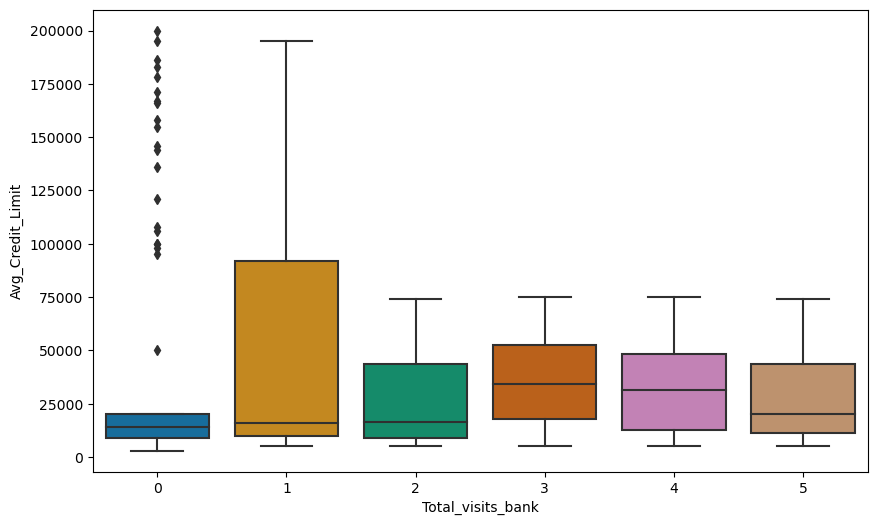

In [10]:
ax = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = df, 
                 x = 'Total_visits_bank', 
                 y = 'Avg_Credit_Limit', 
                 palette = 'colorblind')

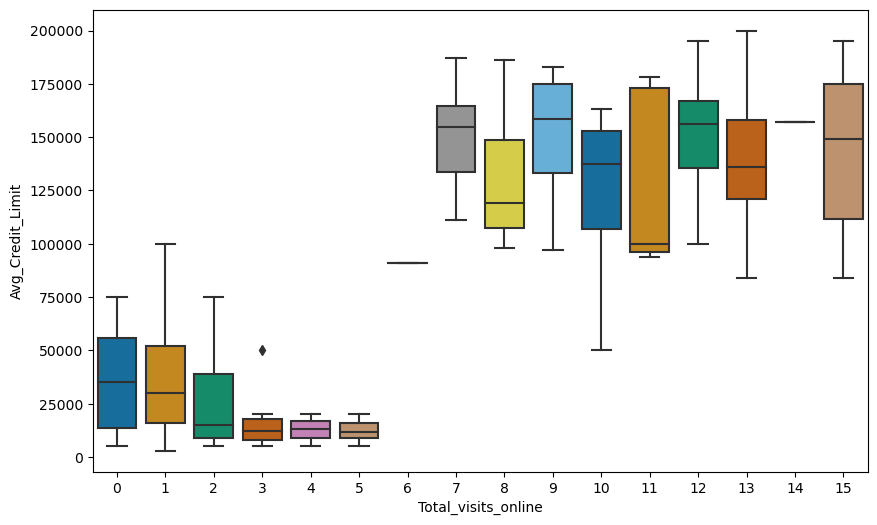

In [11]:
ax = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = df, 
                 x = 'Total_visits_online', 
                 y = 'Avg_Credit_Limit', 
                 palette = 'colorblind')

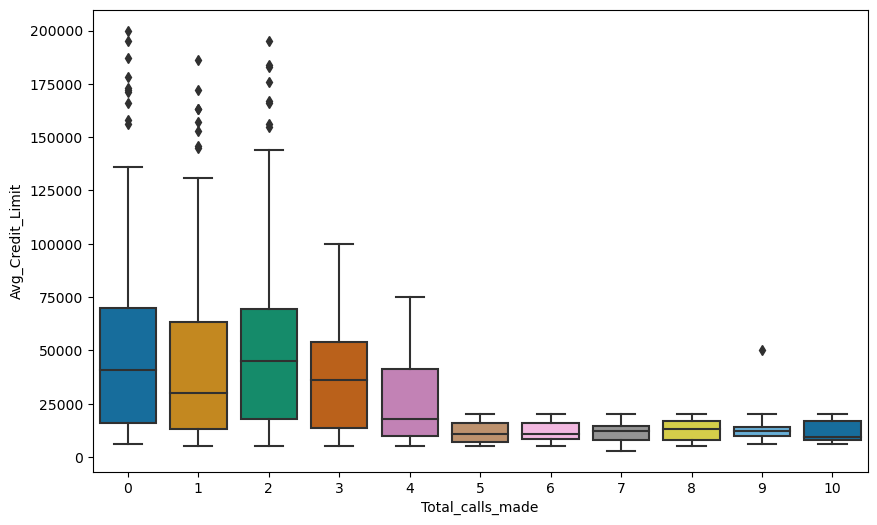

In [12]:
ax = plt.figure(figsize=(10, 6))
ax = sns.boxplot(data = df, 
                 x = 'Total_calls_made', 
                 y = 'Avg_Credit_Limit', 
                 palette = 'colorblind')

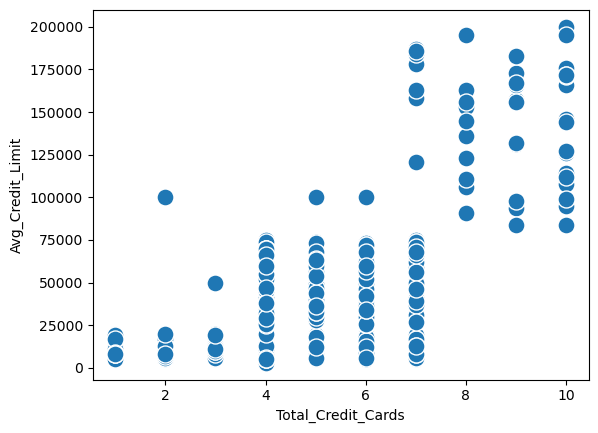

In [13]:
ax = sns.scatterplot(data = df, 
                     x = 'Total_Credit_Cards', 
                     y = 'Avg_Credit_Limit', 
                     s = 150)

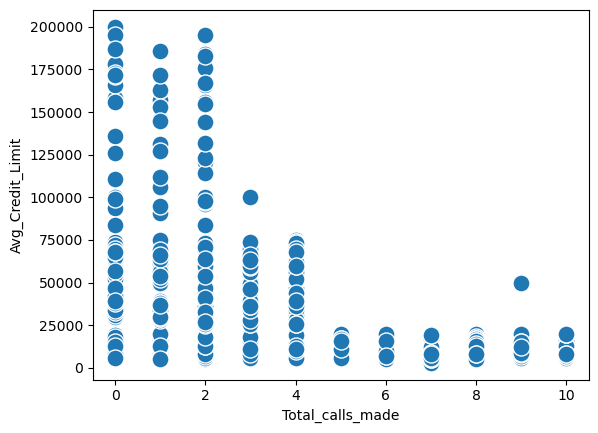

In [14]:
ax = sns.scatterplot(data = df, 
                     x = 'Total_calls_made', 
                     y = 'Avg_Credit_Limit', 
                     s = 150)

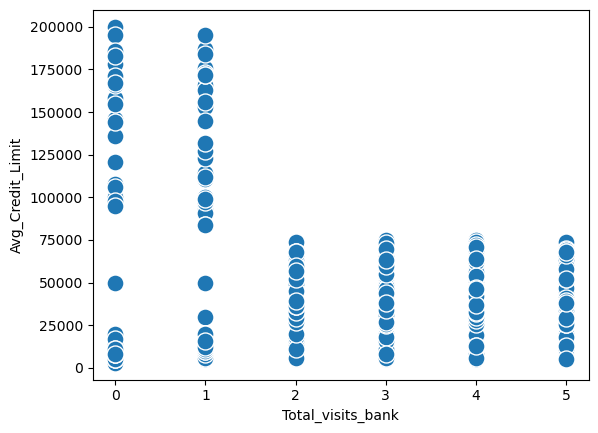

In [15]:
ax = sns.scatterplot(data = df, 
                     x = 'Total_visits_bank', 
                     y = 'Avg_Credit_Limit', 
                     s = 150)

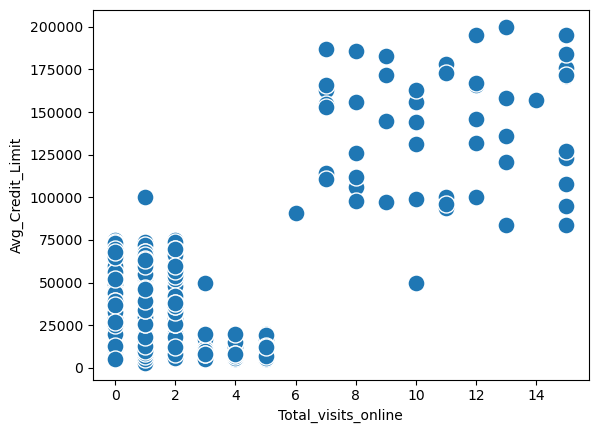

In [16]:
ax = sns.scatterplot(data = df, 
                     x = 'Total_visits_online', 
                     y = 'Avg_Credit_Limit', 
                     s = 150)

### Columns "Total_visits_online" and "Avg_Credit_Limit" tend to make clusters as seen in the scatterpllot above. Going forward let's consider these columns for clustering.

### Prepare the data 

In [17]:
df[['Total_visits_online', 'Avg_Credit_Limit']].describe().round(2)

,Total_visits_online,Avg_Credit_Limit
count,660.00,660.00
mean,2.61,34574.24
std,2.94,37625.49
min,0.00,3000.00
25%,1.00,10000.00
50%,2.00,18000.00
75%,4.00,48000.00
max,15.00,200000.00


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Total_visits_online', 'Avg_Credit_Limit']])

In [19]:
df_scaled = pd.DataFrame(df_scaled, 
                                columns = ['Total_visits_online', 'Avg_Credit_Limit'])

In [20]:
df_scaled.describe().round(2)

,Total_visits_online,Avg_Credit_Limit
count,660.00,660.00
mean,0.00,0.00
std,1.00,1.00
min,-0.89,-0.84
25%,-0.55,-0.65
50%,-0.21,-0.44
75%,0.48,0.36
max,4.22,4.40


### Create the clusters

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [22]:
km.fit(df_scaled)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=25, random_state=1234)

In [23]:
km.labels_

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
km.inertia_

269.2132905654431

### Evaluate and Visualize the Clusters 

In [25]:
pd.Series(km.labels_).value_counts().sort_index()

0    409
1     50
2    201
Name: count, dtype: int64

In [26]:
km.cluster_centers_

array([[-0.06657669, -0.57565012],
       [ 2.85459061,  2.80995382],
       [-0.5746252 ,  0.47235428]])

In [27]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Total_visits_online', 'Avg_Credit_Limit'])
cluster_centers

,Total_visits_online,Avg_Credit_Limit
0,-0.066577,-0.575650
1,2.854591,2.809954
2,-0.574625,0.472354


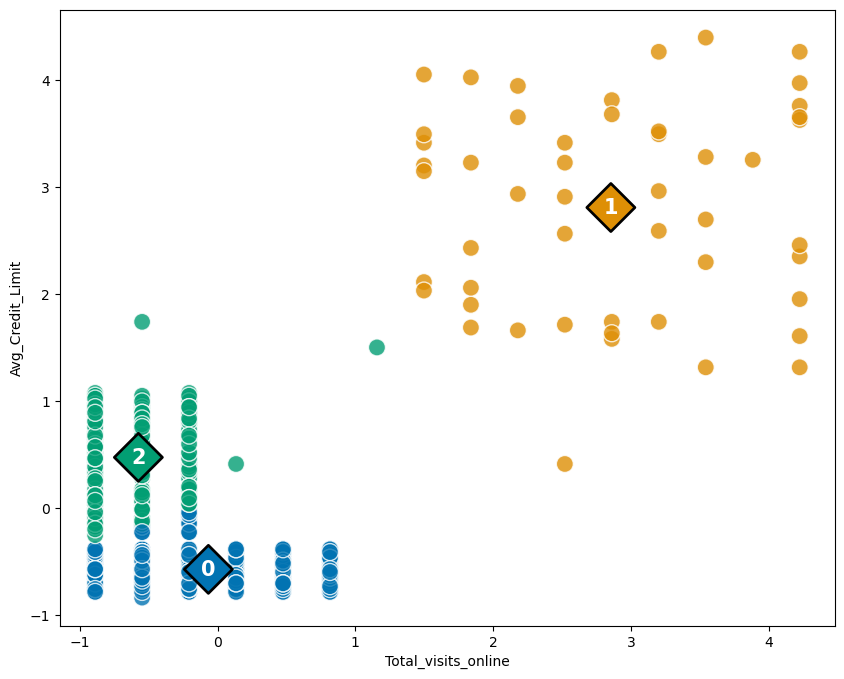

In [28]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = df_scaled,
                     x = 'Total_visits_online',
                     y = 'Avg_Credit_Limit', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Total_visits_online',
                     y = 'Avg_Credit_Limit', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers['Total_visits_online'][i], 
                        y = cluster_centers['Avg_Credit_Limit'][i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

### Choosing the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

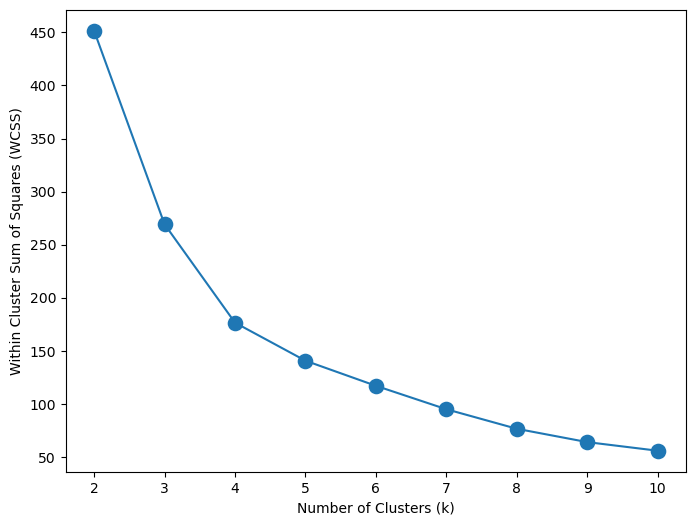

In [31]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

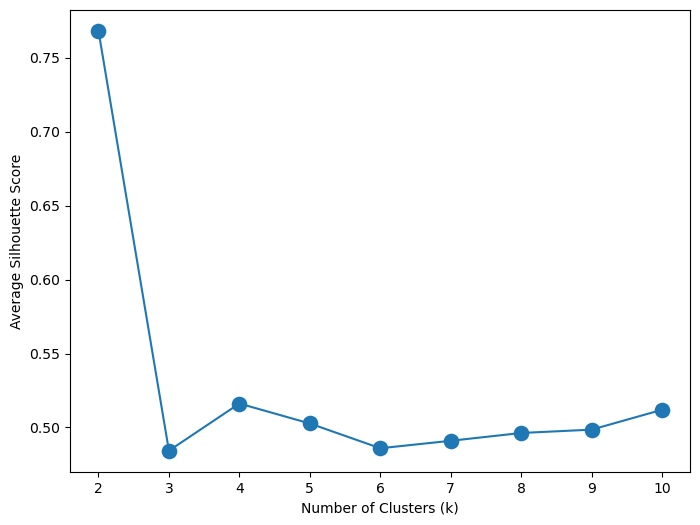

In [32]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

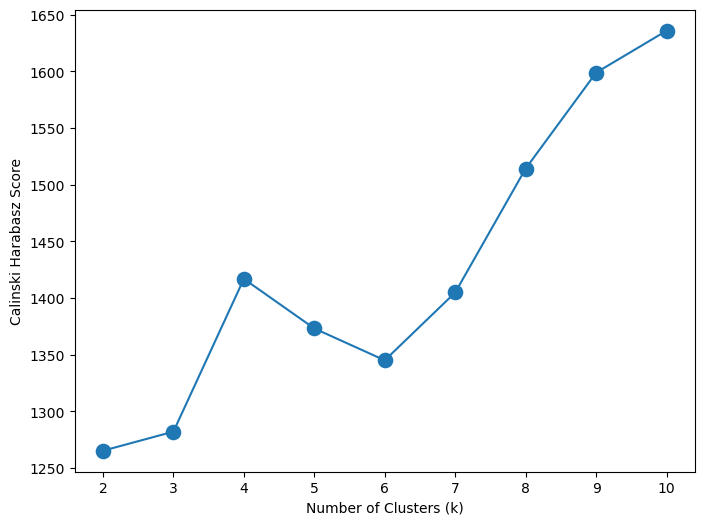

In [33]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    calinski.append(calinski_harabasz_score(df_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

### Considering the above statistical methods it is evident that "K" value of 4 is most suitable for this data to incorpoarate clustering. So, let's now assume the K values as 4.

### Analyze and Interpret the Clusters

In [36]:
km = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)
km.fit(df_scaled)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, n_init=25, random_state=1234)

In [37]:
pd.Series(km.labels_).value_counts().sort_index()

0    182
1     49
2    167
3    262
Name: count, dtype: int64

In [39]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Total_visits_online', 'Avg_Credit_Limit'])

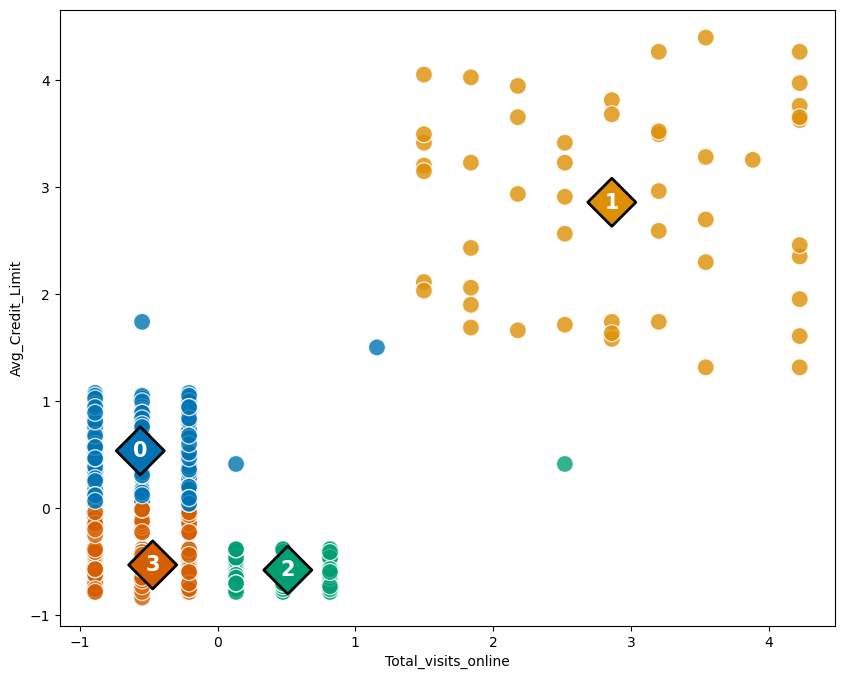

In [41]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = df_scaled,
                     x = 'Total_visits_online',
                     y = 'Avg_Credit_Limit', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Total_visits_online',
                     y = 'Avg_Credit_Limit', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers['Total_visits_online'][i], 
                        y = cluster_centers['Avg_Credit_Limit'][i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [42]:
df['Cluster'] = km.labels_.tolist()
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,3
4,5,47437,100000,6,0,12,3,1
5,6,58634,20000,3,0,1,8,3
6,7,48370,100000,5,0,11,2,1
7,8,37376,15000,3,0,1,1,3
8,9,82490,5000,2,0,2,2,3
9,10,44770,3000,4,0,1,7,3


In [44]:
df.agg({
    'Avg_Credit_Limit': 'mean',
    'Total_Credit_Cards': 'mean',
    'Total_visits_bank': 'median',
    'Total_visits_online': 'median',
    'Total_calls_made': 'median'}).round(2)

Avg_Credit_Limit       34574.24
Total_Credit_Cards         4.71
Total_visits_bank          2.00
Total_visits_online        2.00
Total_calls_made           3.00
dtype: float64

In [46]:
df.groupby('Cluster').agg({
    'Avg_Credit_Limit': 'mean',
    'Total_Credit_Cards': 'mean',
    'Total_visits_bank': 'mean',
    'Total_visits_online': 'mean',
    'Total_calls_made': 'mean'}).round(2)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,54631.87,5.57,3.36,0.96,2.07
1,142061.22,8.76,0.59,11.00,1.08
2,12682.63,2.44,0.93,4.10,6.99
3,14492.37,4.79,3.01,1.23,2.94


## Insights after clustering
1. Customers in cluster 1 are the most important. They tend to make bigger transactions.
2. Customers in cluster 1 dont usually come to bank in person but make a lot of visits online. So, better online services must be provided to them.
3. Customers in cluster 2 and 3 tend to make same amount of business, however customers from cluster 2 tend to make calls for enquiry and customers in cluster 3 tend to make more visits to bank. They must be given better offers in the similar places to encourage them.
4. Customers in cluster 0 make moderate business but tend to visit bank in person and calls rather than visiting online. Bank need to encourage them to visit online and move the, into high-value customers.